In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\python project\Case Study 1 - Retail Case Study\Customer.csv")
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [3]:
prod_cat_info=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\python project\Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [4]:
transactions=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\python project\Case Study 1 - Retail Case Study\Transactions.csv")
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [5]:
ct=pd.merge(left=customer,right=transactions,how='inner',left_on='customer_Id',right_on='cust_id')
ct.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [6]:
ct.shape

(23053, 14)

In [7]:
prod_cat_info.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [8]:
final_data=pd.merge(left=ct,right=prod_cat_info,how='inner',left_on=(['prod_subcat_code','prod_cat_code']),
                    right_on=(['prod_sub_cat_code','prod_cat_code']))
final_data.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,10,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,4,Kids


In [9]:
final_data.shape

(23053, 17)

# 2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   cust_id            23053 non-null  int64  
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  int64  
 8   prod_cat_code      23053 non-null  int64  
 9   Qty                23053 non-null  int64  
 10  Rate               23053 non-null  int64  
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

### b. Top/Bottom 10 observations

In [11]:
final_data.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,10,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,4,Kids
5,268408,02-01-1970,M,4.0,56902862040,268408,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,Electronics,9,Cameras
6,268408,02-01-1970,M,4.0,56844530655,268408,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,Footwear,1,Mens
7,268408,02-01-1970,M,4.0,19516063887,268408,7/9/2012,10,3,4,650,273.000,2873.000,e-Shop,Electronics,10,Audio and video
8,268408,02-01-1970,M,4.0,12644501524,268408,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,Bags,4,Women
9,268408,02-01-1970,M,4.0,63314547725,268408,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,Clothing,1,Women


In [12]:
final_data.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,270476,25-12-1992,F,3.0,78034405353,270476,13-08-2013,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,11,Bath
23044,270476,25-12-1992,F,3.0,3359888057,270476,16-03-2013,10,3,4,361,151.620,1595.620,MBR,Electronics,10,Audio and video
23045,270476,25-12-1992,F,3.0,22883386455,270476,22-05-2012,4,2,4,898,377.160,3969.160,Flagship store,Footwear,4,Kids
23046,270476,25-12-1992,F,3.0,19725194268,270476,21-02-2012,4,4,4,618,259.560,2731.560,e-Shop,Bags,4,Women
23047,270476,25-12-1992,F,3.0,85475160771,270476,9/8/2011,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,5,Computers
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,12,Tools
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,3,Kids
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,Footwear,1,Mens
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,Footwear,1,Mens
23052,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,12,Academic


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [13]:
final_data.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [14]:
final_data.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091
std,2431.692059,2.863499,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,270980.000000,5.000000,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


### d. Frequency tables for all the categorical variables

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   cust_id            23053 non-null  int64  
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  int64  
 8   prod_cat_code      23053 non-null  int64  
 9   Qty                23053 non-null  int64  
 10  Rate               23053 non-null  int64  
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

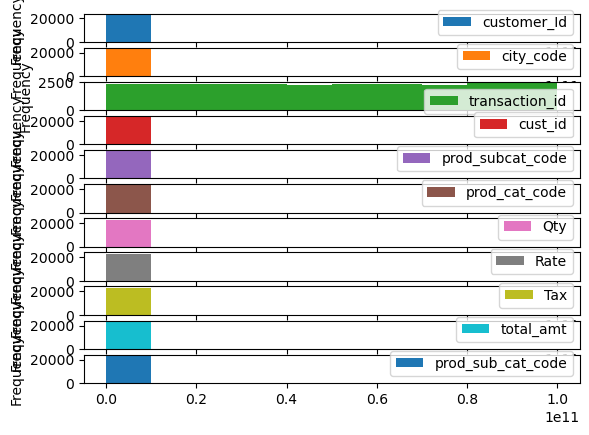

In [17]:
combine=final_data.select_dtypes(['int64','float64'])
combine.plot(kind='hist',subplots = True)
plt.show()

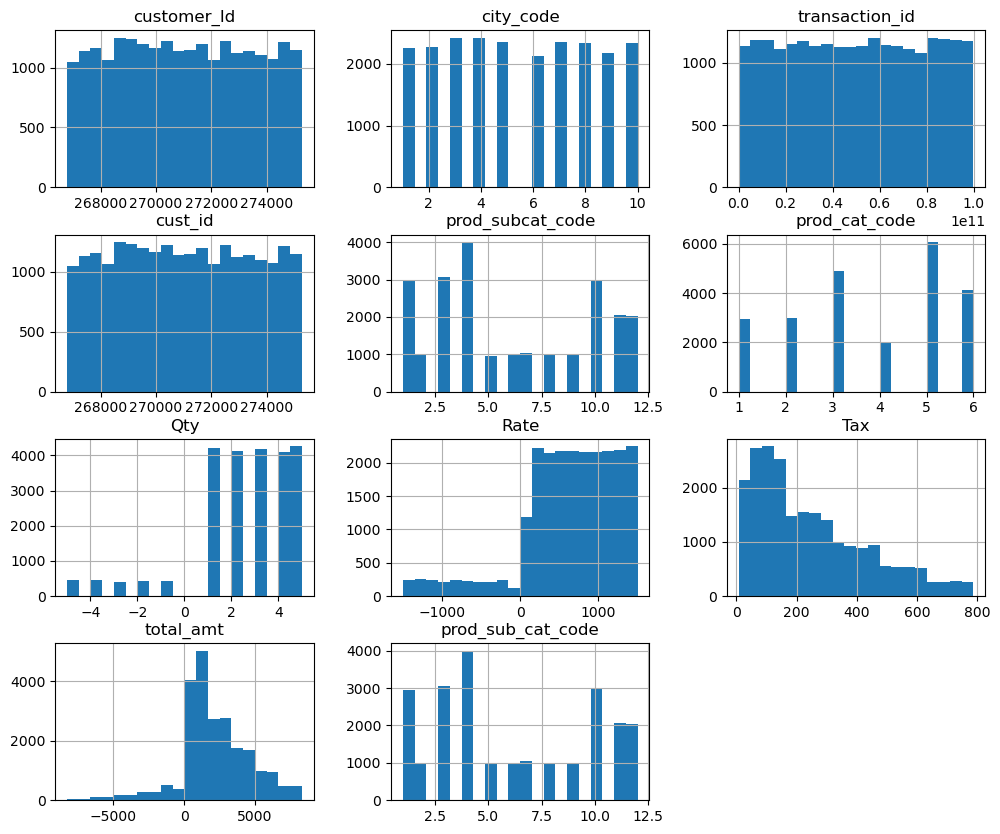

In [19]:
combine.hist(bins=20, figsize=(12, 10))
plt.show()

In [20]:
combine = final_data.select_dtypes(include=['int64', 'float64']).columns

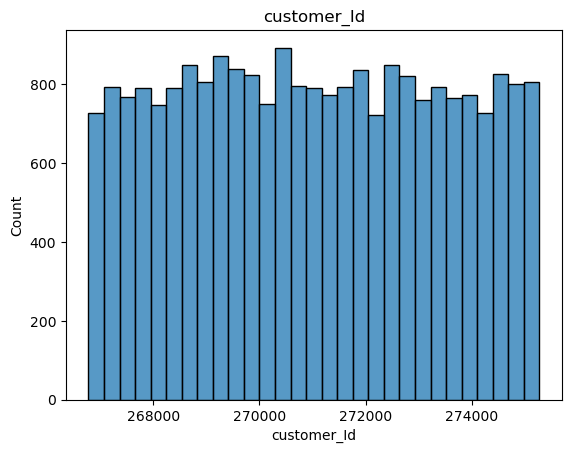

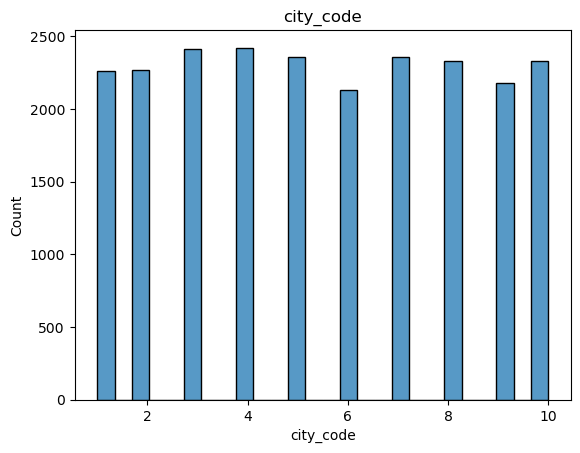

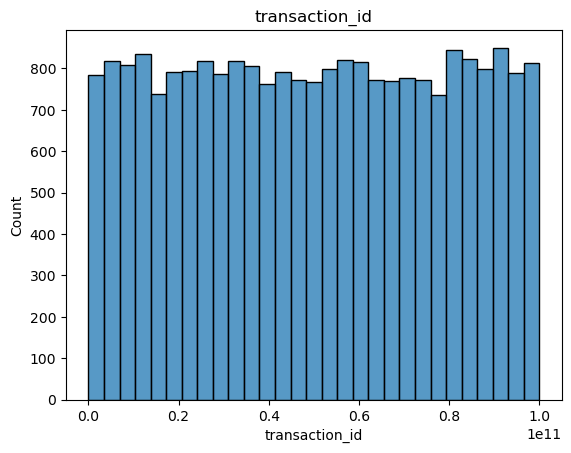

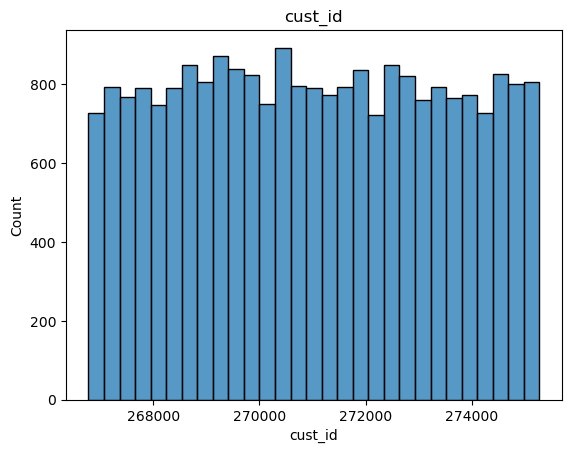

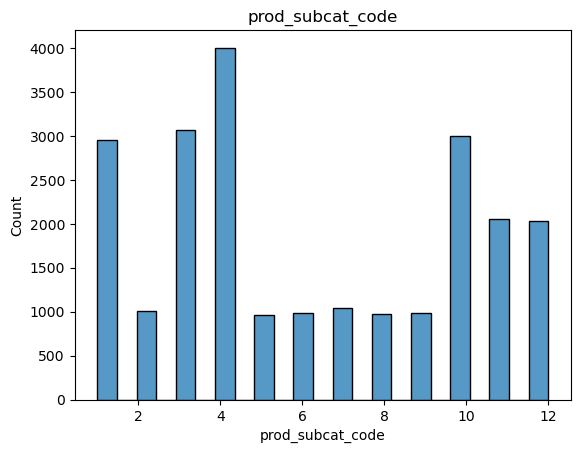

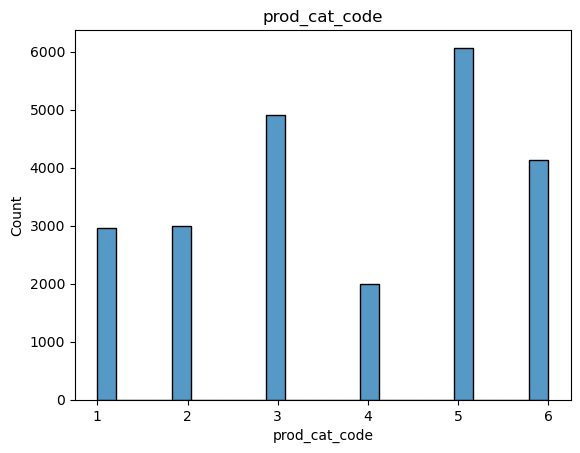

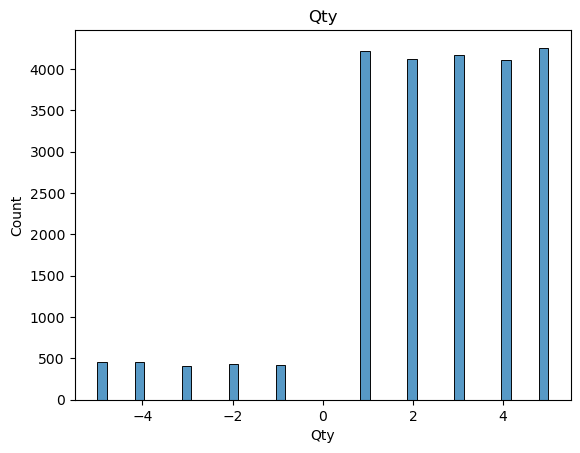

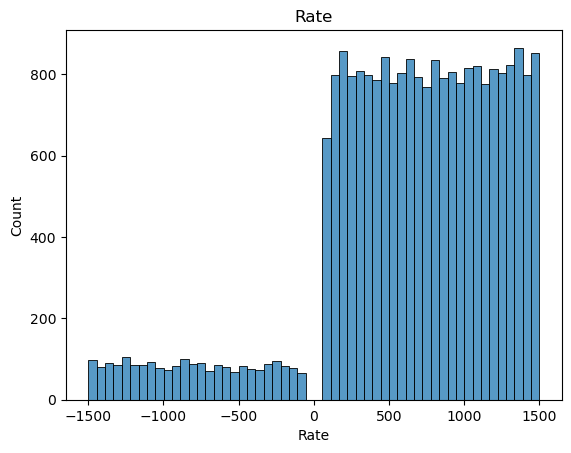

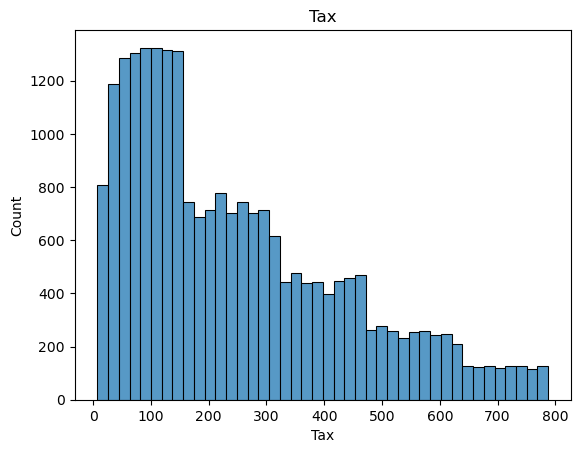

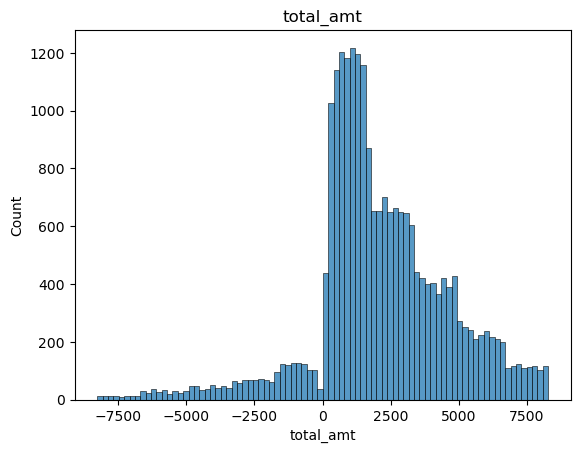

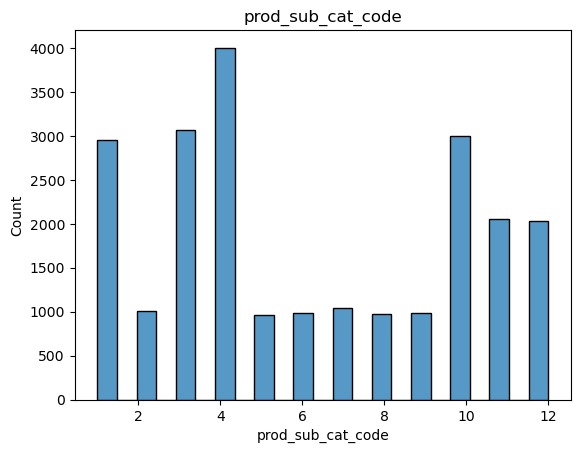

In [21]:
for col in combine:
    sns.histplot(final_data,x=col)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [7]:
count=final_data.select_dtypes('object').columns
count


Index(['DOB', 'Gender', 'tran_date', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

In [29]:
# 4. Calculate the following information using the merged dataset :
a. Time period of the available transaction data
b. Count of transactions where the total amount of transaction was negative

SyntaxError: invalid syntax (498046632.py, line 2)

## a. Time period of the available transaction data

In [30]:
final_data.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,10,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,4,Kids


In [8]:
final_data['tran_date']=pd.to_datetime(final_data['tran_date'],dayfirst=True,errors='coerce')

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        23053 non-null  int64         
 1   DOB                23053 non-null  object        
 2   Gender             23044 non-null  object        
 3   city_code          23045 non-null  float64       
 4   transaction_id     23053 non-null  int64         
 5   cust_id            23053 non-null  int64         
 6   tran_date          13929 non-null  datetime64[ns]
 7   prod_subcat_code   23053 non-null  int64         
 8   prod_cat_code      23053 non-null  int64         
 9   Qty                23053 non-null  int64         
 10  Rate               23053 non-null  int64         
 11  Tax                23053 non-null  float64       
 12  total_amt          23053 non-null  float64       
 13  Store_type         23053 non-null  object        
 14  prod_c

In [9]:
first_date=final_data.tran_date.min()
last_date=final_data.tran_date.max()

In [10]:
timeperiod=last_date-first_date
timeperiod

Timedelta('1130 days 00:00:00')

### b. Count of transactions where the total amount of transaction was negative

In [22]:
final_data.loc[final_data.total_amt<0,['total_amt']].count()

total_amt    2177
dtype: int64

In [23]:
final_data.loc[final_data.total_amt<0,['transaction_id']].count()

transaction_id    2177
dtype: int64

### 5. Analyze which product categories are more popular among females vs male customers.

In [24]:
pd.crosstab(index=final_data.Gender,columns=final_data.prod_cat)

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


<Axes: xlabel='Gender'>

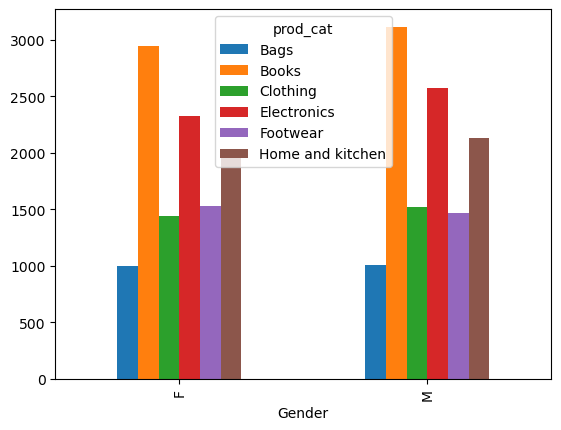

In [25]:
pd.crosstab(index=final_data.Gender,columns=final_data.prod_cat).plot(kind='bar')

In [56]:
final_data.groupby('Gender')['prod_cat'].count().reset_index()

,Gender,prod_cat
0,F,11233
1,M,11811


Text(0, 0.5, 'count of product buy by each gender')

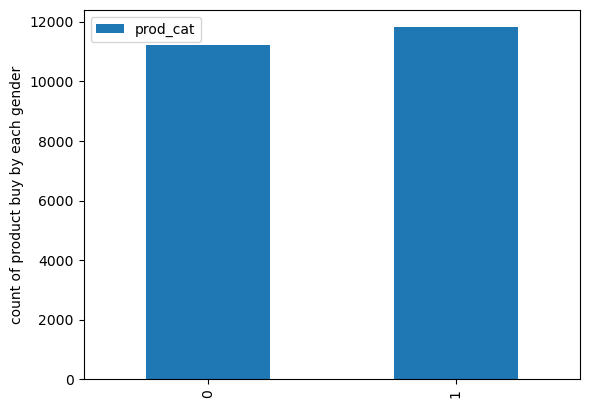

In [26]:
final_data.groupby('Gender')['prod_cat'].count().reset_index().plot(kind='bar')
plt.ylabel('count of product buy by each gender')

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [27]:
pd.DataFrame(final_data.groupby('city_code')['customer_Id'].count()).sort_values('customer_Id',ascending=False)

,customer_Id
city_code,
4.0,2422
3.0,2411
5.0,2360
7.0,2356
10.0,2333
8.0,2330
2.0,2270
1.0,2258
9.0,2178


Text(0, 0.5, 'number of customer')

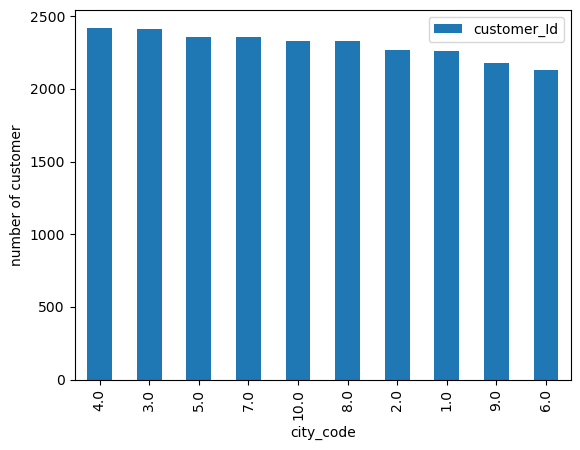

In [28]:
pd.DataFrame(final_data.groupby('city_code')['customer_Id'].count()).sort_values('customer_Id',ascending=False).plot(kind='bar')
plt.ylabel('number of customer')

### 7. Which store type sells the maximum products by value and by quantity?

In [29]:
store_sort=final_data.pivot_table(index='Store_type',values='total_amt',aggfunc='sum')

store_sort.sort_values('total_amt',ascending=True)

,total_amt
Store_type,
TeleShop,9.364781e+06
MBR,9.674486e+06
Flagship store,9.715688e+06
e-Shop,1.982482e+07


Text(0, 0.5, 'total_amount')

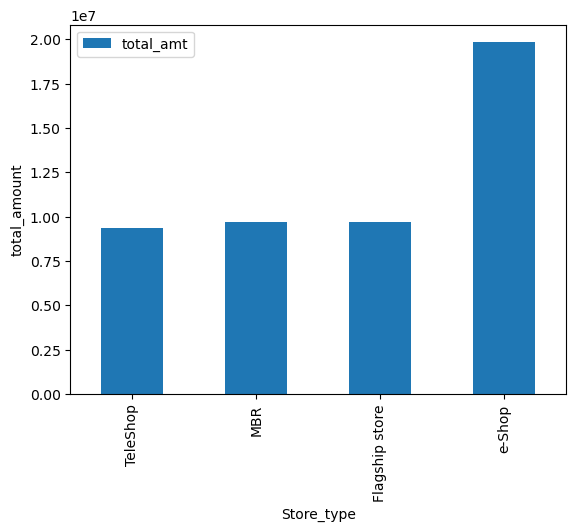

In [30]:
store_sort.sort_values('total_amt',ascending=True).plot(kind='bar')
plt.ylabel('total_amount')

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [31]:
final_data.prod_cat.unique()

array(['Books', 'Bags', 'Home and kitchen', 'Footwear', 'Electronics',
       'Clothing'], dtype=object)

In [32]:
final_data.loc[(final_data.prod_cat.isin(['Electronics','Clothing'])),['total_amt']].sum()

total_amt    1.697360e+07
dtype: float64

#### total amt sale of each product

In [33]:
final_data.pivot_table(index='prod_cat',values='total_amt',aggfunc='sum')

,total_amt
prod_cat,
Bags,4.124709e+06
Books,1.282269e+07
Clothing,6.251137e+06
Electronics,1.072246e+07
Footwear,6.219774e+06
Home and kitchen,8.438993e+06


Text(0, 0.5, 'total_amount')

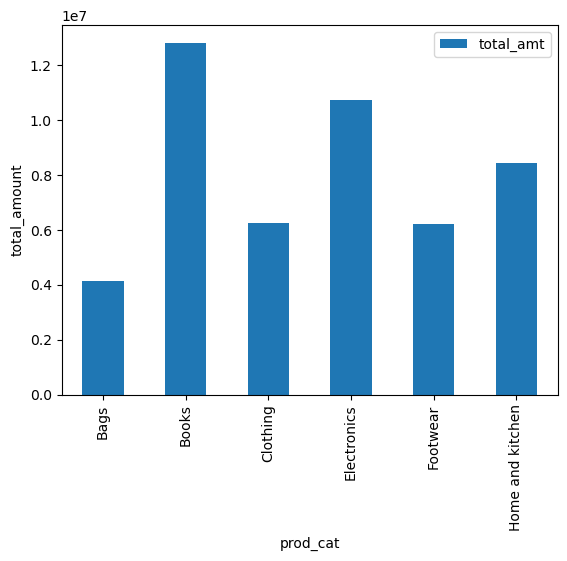

In [27]:
final_data.pivot_table(index='prod_cat',values='total_amt',aggfunc='sum').plot(kind = 'bar')
plt.ylabel('total_amount')

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [36]:
final_data.pivot_table(index='Gender',columns='prod_cat',values='total_amt',aggfunc='sum')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2077985.65,6164692.235,3026750.805,5019354.210,3202552.99,4132177.335
M,2046722.99,6645972.775,3224079.495,5703109.425,3014672.05,4301075.480


<Axes: xlabel='prod_cat'>

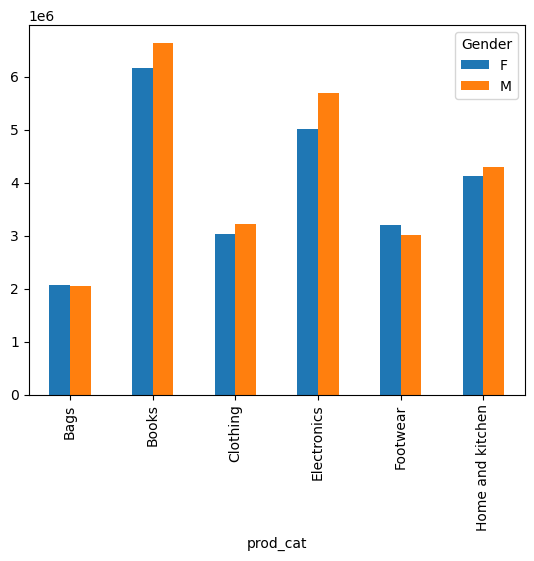

In [37]:
final_data.pivot_table(index='prod_cat',columns='Gender',values='total_amt',aggfunc='sum').plot(kind ='bar')
plt.ylabel('value in million')

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [38]:
positive=final_data

In [39]:
postive = positive[positive['total_amt']>0]

In [40]:
positive.total_amt.min()

-8270.925

In [41]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   cust_id            23053 non-null  int64  
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  int64  
 8   prod_cat_code      23053 non-null  int64  
 9   Qty                23053 non-null  int64  
 10  Rate               23053 non-null  int64  
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

In [42]:
positive.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [43]:
value=pd.DataFrame(positive.groupby(['customer_Id'])['transaction_id'].count())
value=value.reset_index()
value.loc[value.transaction_id>10].head()

,customer_Id,transaction_id
4,266794,12
146,267014,11
635,267768,11
731,267913,11
921,268207,11


In [44]:
value.loc[value.transaction_id>10,['customer_Id']].count()

customer_Id    36
dtype: int64

#11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?
#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   cust_id            23053 non-null  int64  
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  int64  
 8   prod_cat_code      23053 non-null  int64  
 9   Qty                23053 non-null  int64  
 10  Rate               23053 non-null  int64  
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

In [46]:
final_data['DOB']=pd.to_datetime(final_data.DOB,dayfirst=True, errors='coerce')

In [47]:
final_data.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,1970-01-02,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
2,268408,1970-01-02,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens


In [10]:
import datetime as dt

In [48]:
final_data['age']=(final_data.tran_date-final_data.DOB).dt.days//365

TypeError: cannot subtract DatetimeArray from ndarray

In [107]:
final_data.age.isna().sum()

np.int64(9124)

In [108]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        23053 non-null  int64         
 1   DOB                23053 non-null  datetime64[ns]
 2   Gender             23044 non-null  object        
 3   city_code          23045 non-null  float64       
 4   transaction_id     23053 non-null  int64         
 5   cust_id            23053 non-null  int64         
 6   tran_date          13929 non-null  datetime64[ns]
 7   prod_subcat_code   23053 non-null  int64         
 8   prod_cat_code      23053 non-null  int64         
 9   Qty                23053 non-null  int64         
 10  Rate               23053 non-null  int64         
 11  Tax                23053 non-null  float64       
 12  total_amt          20876 non-null  float64       
 13  Store_type         23053 non-null  object        
 14  prod_c

In [109]:
age25_35=final_data.loc[(final_data.age>=25)&(final_data.age<=35)]

## a. What was the total amount spent for “Electronics” and “Books” product categories?

In [110]:

    age25_35.loc[age25_35.prod_cat.isin(['Electronics', 'Books'])] .groupby('prod_cat')['total_amt'].sum()



prod_cat
Books          4194071.700
Electronics    3361678.515
Name: total_amt, dtype: float64

In [111]:
age25_35.pivot_table(index='age',columns='prod_cat',values='total_amt',aggfunc='sum')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
age,,,,,,
25.0,110493.370,342874.870,224477.435,297862.695,189594.795,258107.005
26.0,103224.680,415967.305,197361.840,305508.190,171242.955,235949.545
27.0,108113.200,374165.155,164707.985,325236.860,144459.965,189002.515
28.0,133545.880,422397.300,214008.665,312397.865,156212.745,217646.325
29.0,136733.805,329134.195,167735.685,242252.465,192937.420,190604.765
30.0,162661.525,394736.940,176232.030,275109.640,165219.600,265701.670
31.0,104036.855,380886.870,176285.070,375577.345,212417.465,253484.790
32.0,120563.235,390720.265,228477.535,295566.505,194652.380,229333.910
33.0,98353.840,328571.750,197663.505,318254.365,192976.095,328047.980


In [49]:
age25_35.loc[((age25_35.prod_cat).isin(['Electronics', 'Books'])),['total_amt']].sum()

total_amt    6810776.895
dtype: float64

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [112]:
age25_35.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
5054,268492,1975-02-17,M,1.0,2390580555,268492,2011-01-26,4,4,1,999,104.895,1103.895,TeleShop,Bags,4,Women,35.0


In [114]:
age25_35.loc[(age25_35.tran_date >= '2014-01-01') & (age25_35.tran_date <= '2014-03-01'),'total_amt'].sum()


np.float64(660165.675)

In [115]:
age25_35.loc[(age25_35.tran_date.between('2014-01-01','2014-03-01')),'total_amt'].sum()

np.float64(660165.675)